## Loading Essential Libraries

In [1]:
# Importing essential libraries and modules
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import regexp_tokenize
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import nltk
import re
import random
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # or LancasterStemmer, RegexpStemmer, SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
nltk.__version__

'3.4'

## List of Gutenberg Books

In [2]:
#list of books in gutenberg dataset
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

## Custom Function for Data cleaning and Preprocessing 

In [3]:
# Data cleaning and pre-processing
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english') # or any other list of your choice
def clean_text(text, ):

    def tokenize_text(text):
        return [w for s in sent_tokenize(text) for w in word_tokenize(s)]

    def remove_special_characters(text, characters=string.punctuation.replace('-', '')):
        tokens = tokenize_text(text)
        pattern = re.compile('[{}]'.format(re.escape(characters)))
        return ' '.join(filter(None, [pattern.sub('', t) for t in tokens]))

    def stem_text(text, stemmer=default_stemmer):
        tokens = tokenize_text(text)
        return ' '.join([stemmer.stem(t) for t in tokens])

    def remove_stopwords(text, stop_words=default_stopwords):
        tokens = [w for w in tokenize_text(text) if w not in stop_words]
        return ' '.join(tokens)

    text = text.strip(' ') # strip whitespaces
    text = text.lower() # lowercase
    #text = stem_text(text) # stemming
    text = remove_special_characters(text) # remove punctuation and symbols
    text = remove_stopwords(text) # remove stopwords
    text.strip(' ') # strip whitespaces again?

    return text

In [4]:
# Reading 7 random books
original_book1 = gutenberg.raw('austen-emma.txt')
original_book2 = gutenberg.raw('burgess-busterbrown.txt')
original_book3 = gutenberg.raw('edgeworth-parents.txt')
original_book4 = gutenberg.raw('chesterton-brown.txt')
original_book5 = gutenberg.raw('bryant-stories.txt')
original_book6 = gutenberg.raw('shakespeare-hamlet.txt')
original_book7 = gutenberg.raw('whitman-leaves.txt')

In [5]:
# Cleaned books
book1_clean = clean_text(original_book1)
book2_clean = clean_text(original_book2)
book3_clean = clean_text(original_book3)
book4_clean = clean_text(original_book4)
book5_clean = clean_text(original_book5)
book6_clean = clean_text(original_book6)
book7_clean = clean_text(original_book7)

In [6]:
#Word Tokens
tokenized_words1=nltk.word_tokenize(book1_clean)
tokenized_words2=nltk.word_tokenize(book2_clean)
tokenized_words3=nltk.word_tokenize(book3_clean)
tokenized_words4=nltk.word_tokenize(book4_clean)
tokenized_words5=nltk.word_tokenize(book5_clean)
tokenized_words6=nltk.word_tokenize(book6_clean)
tokenized_words7=nltk.word_tokenize(book7_clean)
#Sentence Tokens
tokenized_sents1=nltk.sent_tokenize(original_book1)
tokenized_sents2=nltk.sent_tokenize(original_book2)
tokenized_sents3=nltk.sent_tokenize(original_book3)
tokenized_sents4=nltk.sent_tokenize(original_book4)
tokenized_sents5=nltk.sent_tokenize(original_book5)
tokenized_sents6=nltk.sent_tokenize(original_book6)
tokenized_sents7=nltk.sent_tokenize(original_book7)

## Slicing to 150 words

In [7]:
slice1 = [book1_clean[i:i+150] for i in range(0, len(book1_clean), 150)]
slice2 = [book2_clean[i:i+150] for i in range(0, len(book2_clean), 150)]
slice3 = [book3_clean[i:i+150] for i in range(0, len(book3_clean), 150)]
slice4 = [book4_clean[i:i+150] for i in range(0, len(book4_clean), 150)]
slice5 = [book5_clean[i:i+150] for i in range(0, len(book5_clean), 150)]
slice6 = [book6_clean[i:i+150] for i in range(0, len(book6_clean), 150)]
slice7 = [book7_clean[i:i+150] for i in range(0, len(book7_clean), 150)]

## Creating random 200 samples

In [8]:
number_of_samples = 200
random_book_1 = random.choices(population=slice1, k=number_of_samples)
random_book_2 = random.choices(population=slice2, k=number_of_samples)
random_book_3 = random.choices(population=slice3, k=number_of_samples)
random_book_4 = random.choices(population=slice4, k=number_of_samples)
random_book_5 = random.choices(population=slice5, k=number_of_samples)
random_book_6 = random.choices(population=slice6, k=number_of_samples)
random_book_7 = random.choices(population=slice7, k=number_of_samples)

In [9]:
r_book_1 = random.choices(population=tokenized_sents1, k=number_of_samples)
r_book_2 = random.choices(population=tokenized_sents2, k=number_of_samples)
r_book_3 = random.choices(population=tokenized_sents3, k=number_of_samples)
r_book_4 = random.choices(population=tokenized_sents4, k=number_of_samples)
r_book_5 = random.choices(population=tokenized_sents5, k=number_of_samples)
r_book_6 = random.choices(population=tokenized_sents6, k=number_of_samples)
r_book_7 = random.choices(population=tokenized_sents7, k=number_of_samples)

In [10]:
all_seven = r_book_1+r_book_2+r_book_3+r_book_4+r_book_5+r_book_6+r_book_7
all_seven_c = random_book_1+random_book_2+random_book_3+random_book_4+random_book_5+random_book_6+random_book_7
words = tokenized_words1+tokenized_words2+tokenized_words3+tokenized_words4+tokenized_words5+tokenized_words6+tokenized_words7

In [11]:
a = list(set(tokenized_words1))
b = list(set(tokenized_words2))
c = list(set(tokenized_words3))
d = list(set(tokenized_words4))
e = list(set(tokenized_words5))
f = list(set(tokenized_words6))
g = list(set(tokenized_words7))

## Building Dataframes

In [12]:
d1 = pd.DataFrame({'Word':a,'Author':"Austen Emma",'Label':1})
d2 = pd.DataFrame({'Word':b,'Author':"Burgess Busterbrown",'Label':2})
d3 = pd.DataFrame({'Word':c,'Author':"Edgeworth Parents",'Label':3})
d4 = pd.DataFrame({'Word':d,'Author':"Chesterton Brown",'Label':4})
d5 = pd.DataFrame({'Word':e,'Author':"Bryant Stories",'Label':5})
d6 = pd.DataFrame({'Word':f,'Author':"Shakespeare Hamlet",'Label':6})
d7 = pd.DataFrame({'Word':g,'Author':"Whitman Leaves",'Label':7})
dataset = pd.concat([d1, d2, d3, d4, d5, d6, d7], ignore_index=True)

In [13]:
df1 = pd.DataFrame({'data':random_book_1,'Author':"Austen Emma",'Label':1,'sent_tokens':r_book_1})
df2 = pd.DataFrame({'data':random_book_2,'Author':"Burgess Busterbrown",'Label':2,'sent_tokens':r_book_2})
df3 = pd.DataFrame({'data':random_book_3,'Author':"Edgeworth Parents",'Label':3,'sent_tokens':r_book_3})
df4 = pd.DataFrame({'data':random_book_4,'Author':"Chesterton Brown",'Label':4,'sent_tokens':r_book_4})
df5 = pd.DataFrame({'data':random_book_5,'Author':"Bryant Stories",'Label':5,'sent_tokens':r_book_5})
df6 = pd.DataFrame({'data':random_book_6,'Author':"Shakespeare Hamlet",'Label':6,'sent_tokens':r_book_6})
df7 = pd.DataFrame({'data':random_book_7,'Author':"Whitman Leaves",'Label':7,'sent_tokens':r_book_7})

In [14]:
df_final = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)
df_final = shuffle(df_final)
df_final.head()

,data,Author,Label,sent_tokens
775,asked whether rocky gate twisted river gate fa...,Chesterton Brown,4,They used to crop\ncriminals' ears in the sixt...
1064,d neerer offence beare smooth euen sodaine sen...,Shakespeare Hamlet,6,"I finde thee apt,\nAnd duller should'st thou b..."
639,ollowed track spaniard curse doubt would put a...,Chesterton Brown,4,Flambeau was gloomy.
517,ough walk hip joint mrs tattle good eyes stare...,Edgeworth Parents,3,I've nothing on my mind.
958,w puffed tugged mans cloak raised storm hail r...,Bryant Stories,5,That day a customer came and bought both pairs...


## Feature Engineering

In [19]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [20]:
df_final['sent_tokens'] = df_final['sent_tokens'].apply(remove_punctuation)
df_final.head()

,data,Author,Label,sent_tokens
775,asked whether rocky gate twisted river gate fa...,Chesterton Brown,4,They used to crop\ncriminals ears in the sixte...
1064,d neerer offence beare smooth euen sodaine sen...,Shakespeare Hamlet,6,I finde thee apt\nAnd duller shouldst thou be ...
639,ollowed track spaniard curse doubt would put a...,Chesterton Brown,4,Flambeau was gloomy
517,ough walk hip joint mrs tattle good eyes stare...,Edgeworth Parents,3,Ive nothing on my mind
958,w puffed tugged mans cloak raised storm hail r...,Bryant Stories,5,That day a customer came and bought both pairs...


In [21]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [22]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [23]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [24]:
df_final['sent_tokens'] = df_final['sent_tokens'].apply(stopwords)
df_final.head()

,data,Author,Label,sent_tokens
775,asked whether rocky gate twisted river gate fa...,Chesterton Brown,4,used crop criminals ears sixteenth century
1064,d neerer offence beare smooth euen sodaine sen...,Shakespeare Hamlet,6,finde thee apt duller shouldst thou fat weede ...
639,ollowed track spaniard curse doubt would put a...,Chesterton Brown,4,flambeau gloomy
517,ough walk hip joint mrs tattle good eyes stare...,Edgeworth Parents,3,ive nothing mind
958,w puffed tugged mans cloak raised storm hail r...,Bryant Stories,5,day customer came bought pairs paid much shoem...


In [25]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df_final['sent_tokens'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items() 

In [29]:
# create an object of stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [30]:
df_final['sent_tokens'] = df_final['sent_tokens'].apply(stemming)
df_final.head()

,data,Author,Label,sent_tokens
775,asked whether rocky gate twisted river gate fa...,Chesterton Brown,4,use crop crimin ear sixteenth centuri
1064,d neerer offence beare smooth euen sodaine sen...,Shakespeare Hamlet,6,find thee apt duller shouldst thou fat weed ro...
639,ollowed track spaniard curse doubt would put a...,Chesterton Brown,4,flambeau gloomi
517,ough walk hip joint mrs tattle good eyes stare...,Edgeworth Parents,3,ive noth mind
958,w puffed tugged mans cloak raised storm hail r...,Bryant Stories,5,day custom came bought pair paid much shoemak ...


In [33]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [34]:
df_final['length'] = df_final['sent_tokens'].apply(length)
df_final.head()

,data,Author,Label,sent_tokens,length
775,asked whether rocky gate twisted river gate fa...,Chesterton Brown,4,use crop crimin ear sixteenth centuri,37
1064,d neerer offence beare smooth euen sodaine sen...,Shakespeare Hamlet,6,find thee apt duller shouldst thou fat weed ro...,86
639,ollowed track spaniard curse doubt would put a...,Chesterton Brown,4,flambeau gloomi,15
517,ough walk hip joint mrs tattle good eyes stare...,Edgeworth Parents,3,ive noth mind,13
958,w puffed tugged mans cloak raised storm hail r...,Bryant Stories,5,day custom came bought pair paid much shoemak ...,76


In [35]:
# Extracting data of each class
Austen_data = df_final[df_final['Label'] == 1]
Burgess_data = df_final[df_final['Label'] == 2]
Edgeworth_data = df_final[df_final['Label'] == 3]
Chesterton_data = df_final[df_final['Label'] == 4]
Bryant_data = df_final[df_final['Label'] == 5]
Shakespeare_data = df_final[df_final['Label'] == 6]
Whitman_data = df_final[df_final['Label'] == 7]

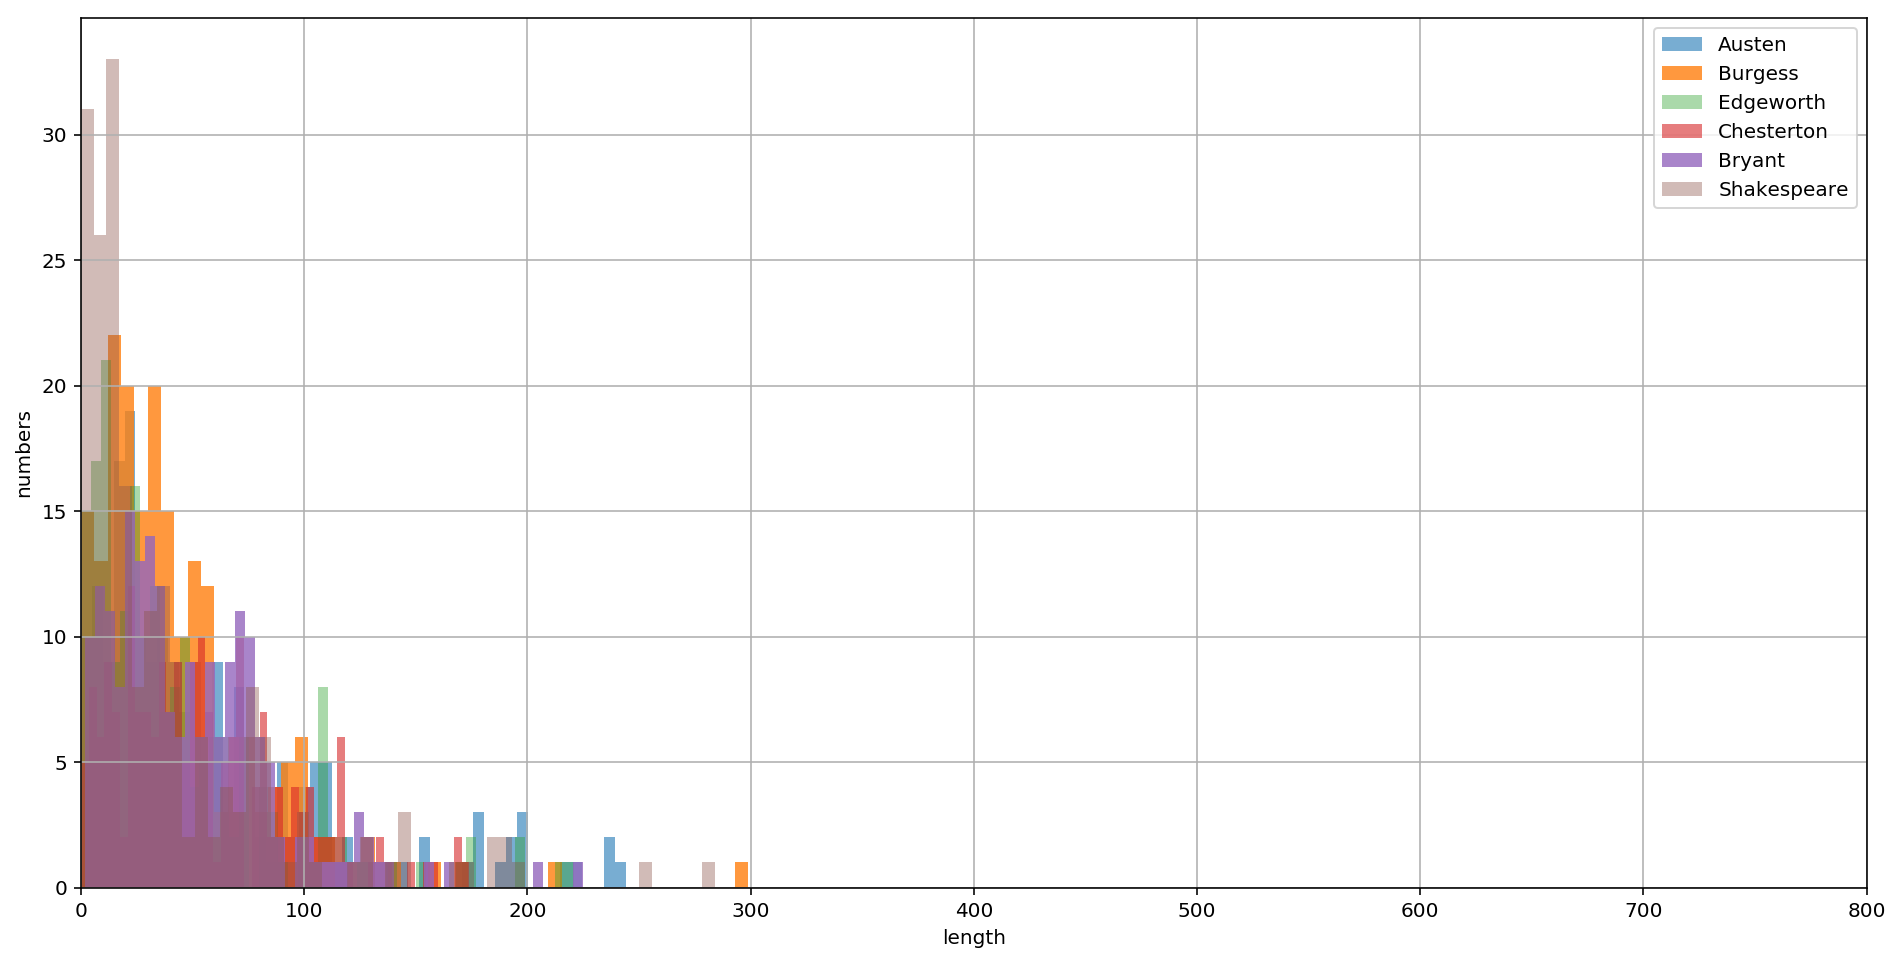

In [36]:
# Histogram of text lenght of each writer
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
bins = 50
plt.hist(Austen_data['length'], alpha = 0.6, bins=bins, label='Austen')
plt.hist(Burgess_data['length'], alpha = 0.8, bins=bins, label='Burgess')
plt.hist(Edgeworth_data['length'], alpha = 0.4, bins=bins, label='Edgeworth')
plt.hist(Chesterton_data['length'], alpha = 0.6, bins=bins, label='Chesterton')
plt.hist(Bryant_data['length'], alpha = 0.8, bins=bins, label='Bryant')
plt.hist(Shakespeare_data['length'], alpha = 0.4, bins=bins, label='Shakespeare')
#plt.hist(Whitman_data['length'], alpha = 0.2, bins=bins, label='Whitman')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,800)
plt.grid()
plt.show()

## Bag of words approach

In [122]:
documents=np.asarray(df_final.data)
labels=np.asarray(df_final.Author)

In [124]:
mdoc=np.c_[documents,labels]
np.random.shuffle(mdoc)
afterlabel=mdoc[:,-1:]
afterdoc=mdoc[:,:150]
df=pd.DataFrame(afterdoc)
y=pd.DataFrame(afterlabel)
ym=np.unique(y)
df=[" ".join(c) for c in df.values]
df=pd.DataFrame(df)

In [138]:
count_vect = CountVectorizer()
X_train_counts = (count_vect.fit_transform(df[0]))

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_train_counts ,y,test_size=.20,shuffle='true', random_state=10)
classifier = KNeighborsClassifier(n_neighbors=5)  
c1=classifier.fit(X_train , y_train.values.ravel())
predic=c1.predict(X_test)
r1=accuracy_score(y_test,predic)*100
print("Accuracy of BOW k-Neighbour classifier",accuracy_score(y_test,predic))
confusion1=confusion_matrix(y_test, predic)
print('Confusion matrix BOW kNeighbour', confusion1)
print(classification_report(y_test, predic))

Accuracy of BOW kNeighbour classifier 0.9821428571428571
Confusion matrix BOW kNeighbour [[33  0  0  0  1  0  0]
 [ 1 36  0  0  0  0  0]
 [ 2  0 38  0  0  0  0]
 [ 0  0  0 38  0  0  0]
 [ 0  0  0  0 44  0  0]
 [ 0  0  0  0  0 54  0]
 [ 1  0  0  0  0  0 32]]
                     precision    recall  f1-score   support

        Austen Emma       0.89      0.97      0.93        34
     Bryant Stories       1.00      0.97      0.99        37
Burgess Busterbrown       1.00      0.95      0.97        40
   Chesterton Brown       1.00      1.00      1.00        38
  Edgeworth Parents       0.98      1.00      0.99        44
 Shakespeare Hamlet       1.00      1.00      1.00        54
     Whitman Leaves       1.00      0.97      0.98        33

          micro avg       0.98      0.98      0.98       280
          macro avg       0.98      0.98      0.98       280
       weighted avg       0.98      0.98      0.98       280



In [140]:
# Decision tree using BOW
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train) 
y_pred1 = classifier.predict(X_test) 
r2=accuracy_score(y_test,y_pred1)*100
print("Accuracy of BOW Decision tree classifier",accuracy_score(y_test,y_pred1))
confusion2=confusion_matrix(y_test, y_pred1)
print('Confusion matrix BOW Decision tree', confusion2)
print(classification_report(y_test, y_pred1))

Accuracy of BOW Decision tree classifier 1.0
Confusion matrix BOW Decision tree [[34  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 0  0  0 38  0  0  0]
 [ 0  0  0  0 44  0  0]
 [ 0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0 33]]
                     precision    recall  f1-score   support

        Austen Emma       1.00      1.00      1.00        34
     Bryant Stories       1.00      1.00      1.00        37
Burgess Busterbrown       1.00      1.00      1.00        40
   Chesterton Brown       1.00      1.00      1.00        38
  Edgeworth Parents       1.00      1.00      1.00        44
 Shakespeare Hamlet       1.00      1.00      1.00        54
     Whitman Leaves       1.00      1.00      1.00        33

          micro avg       1.00      1.00      1.00       280
          macro avg       1.00      1.00      1.00       280
       weighted avg       1.00      1.00      1.00       280



In [141]:
# SVM BOW
sv1= svm.SVC(kernel='linear', C=10)
sv1.fit(X_train, y_train)  
y_sv1 = sv1.predict(X_test)
r3=accuracy_score(y_test,y_sv1)*100
print("Accuracy of BOW SVM classifier", accuracy_score(y_test,y_sv1))
confusion3=confusion_matrix(y_test, y_sv1)
print('Confusion matrix BOW SVM', confusion3)
print(classification_report(y_test, y_sv1))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of BOW SVM classifier 1.0
Confusion matrix BOW SVM [[34  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 0  0  0 38  0  0  0]
 [ 0  0  0  0 44  0  0]
 [ 0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0 33]]
                     precision    recall  f1-score   support

        Austen Emma       1.00      1.00      1.00        34
     Bryant Stories       1.00      1.00      1.00        37
Burgess Busterbrown       1.00      1.00      1.00        40
   Chesterton Brown       1.00      1.00      1.00        38
  Edgeworth Parents       1.00      1.00      1.00        44
 Shakespeare Hamlet       1.00      1.00      1.00        54
     Whitman Leaves       1.00      1.00      1.00        33

          micro avg       1.00      1.00      1.00       280
          macro avg       1.00      1.00      1.00       280
       weighted avg       1.00      1.00      1.00       280



In [142]:
# BOW 10 Fold
# K Fold Cross Validation
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
num_instances = len(X_train_counts.toarray())
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X_train_counts, y, cv=kfold)
print("Accuracy of 10-Fold cross validation BOW:" , (results.mean()*100.0, results.std()*100.0))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of 10-Fold cross validation BOW: (100.0, 0.0)


## TF-IDF

In [91]:
label_id_df = df_final[['Author', 'Label']].drop_duplicates().sort_values('Label')
category_to_id = dict(label_id_df.values)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_final.data).toarray()
labels = df_final.Label
features.shape

(1400, 1203)

In [92]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Author, Label in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == Label)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Author))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Austen Emma':
  . Most correlated unigrams:
. jane
. emma
  . Most correlated bigrams:
. mrs weston
. mr knightley
# 'Bryant Stories':
  . Most correlated unigrams:
. lion
. margery
  . Most correlated bigrams:
. little red
. little jackal
# 'Burgess Busterbrown':
  . Most correlated unigrams:
. bear
. buster
  . Most correlated bigrams:
. little joe
. buster bear
# 'Chesterton Brown':
  . Most correlated unigrams:
. muscari
. priest
  . Most correlated bigrams:
. said father
. father brown
# 'Edgeworth Parents':
  . Most correlated unigrams:
. archer
. susan
  . Most correlated bigrams:
. lady diana
. sir arthur
# 'Shakespeare Hamlet':
  . Most correlated unigrams:
. haue
. ham
  . Most correlated bigrams:
. thou hast
. lord ham
# 'Whitman Leaves':
  . Most correlated unigrams:
. soul
. poems
  . Most correlated bigrams:
. little joe
. buster bear


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df_final['data'], df_final['Author'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [76]:
print(clf.predict(count_vect.transform(["se clo whoreson mad fellowes whose doe thinke ham nay know clo pestilence mad rogue pour flaggon renish head scull sir scull sir yoricks scull kings i"])))

['Shakespeare Hamlet']


In [77]:
df_final[df_final['data'] == "se clo whoreson mad fellowes whose doe thinke ham nay know clo pestilence mad rogue pour flaggon renish head scull sir scull sir yoricks scull kings i"]

,data,Author,Label,sent_tokens,length
1173,se clo whoreson mad fellowes whose doe thinke ...,Shakespeare Hamlet,6,vse eueri man desart scape whip vse honor digniti,49


In [78]:
print(clf.predict(count_vect.transform(["everybody hurried sure something exciting going presently buster heard light footsteps peeping saw billy mink peter rabbit jumper hare prickly porky"])))

['Burgess Busterbrown']


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

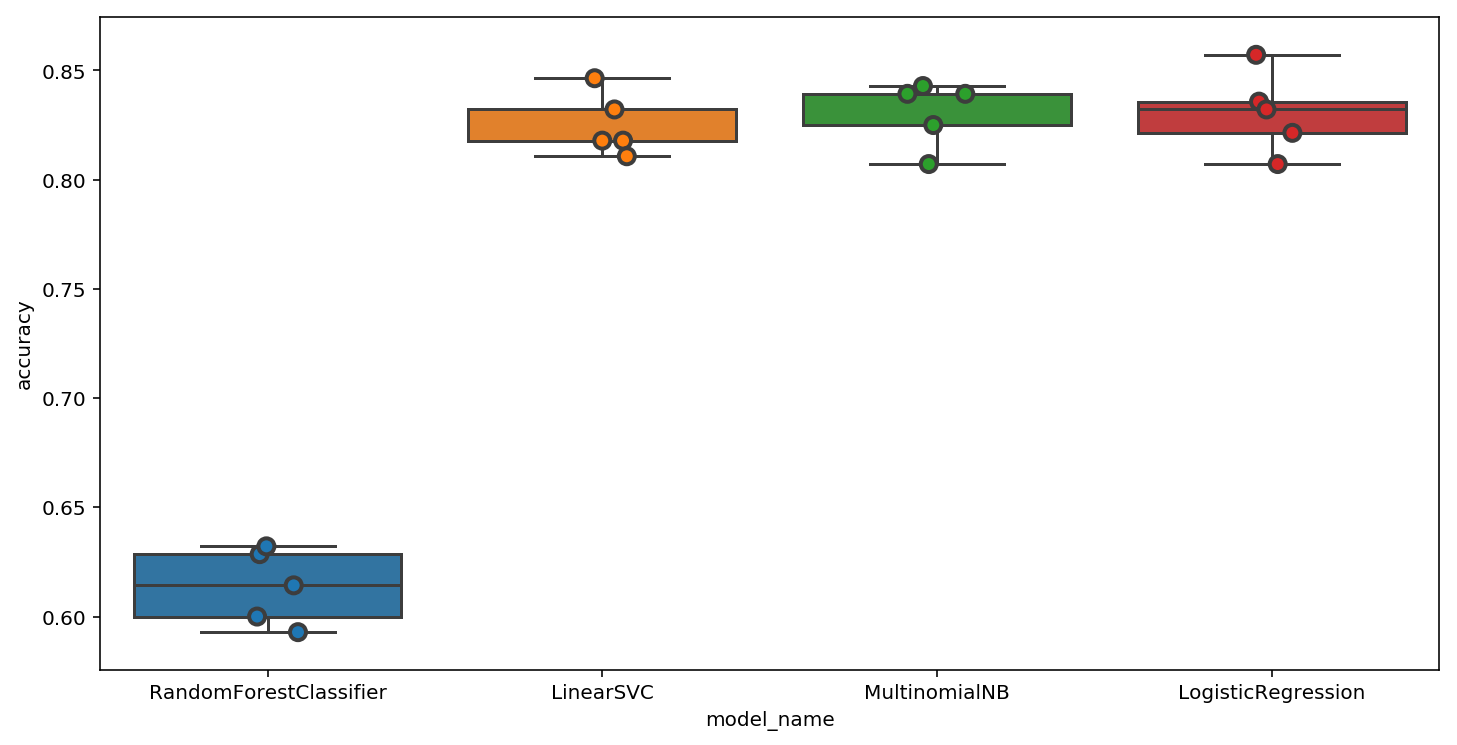

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [94]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.825000
LogisticRegression        0.830714
MultinomialNB             0.830714
RandomForestClassifier    0.613571
Name: accuracy, dtype: float64

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


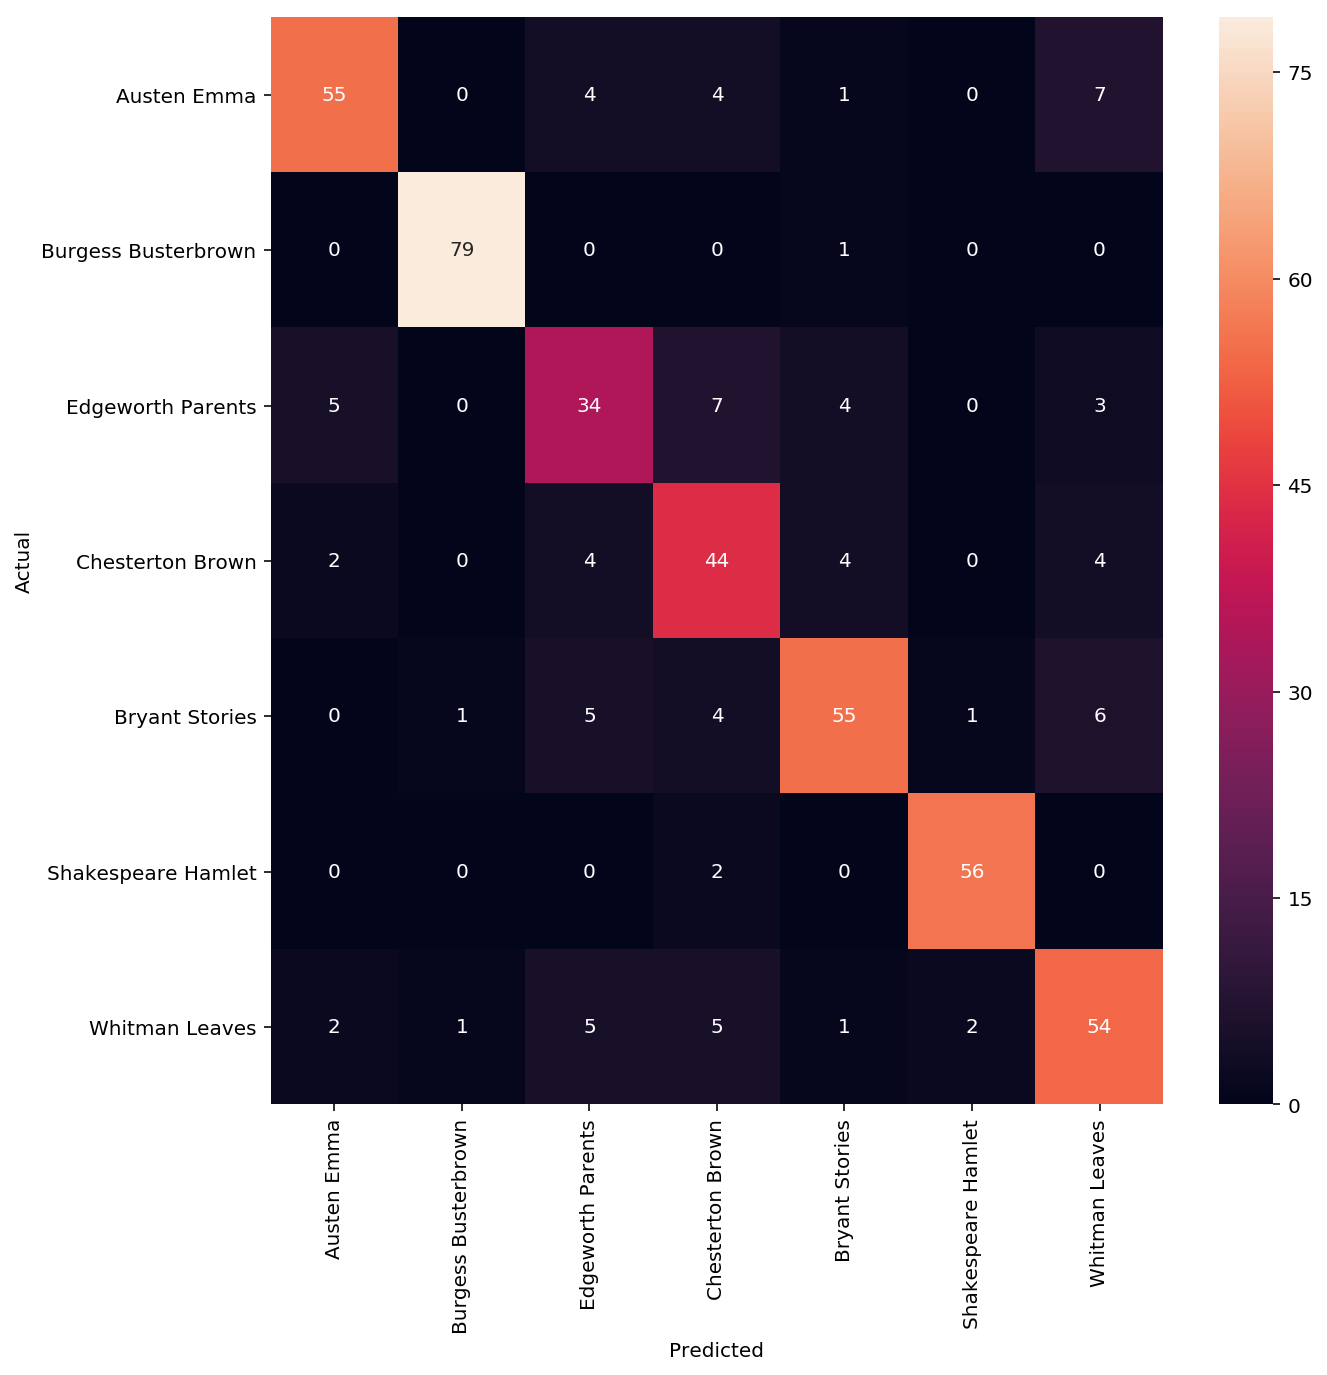

In [99]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_id_df.Author.values, yticklabels=label_id_df.Author.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(df_final['sent_tokens'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [100]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(df_final['data'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [101]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training Model

In [102]:
df['output'] = df_final['Author']
df['id'] = df_final.index
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4018,4019,4020,4021,4022,4023,4024,4025,output,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,775
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,1064
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,639
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,517
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,958
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,207
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,666
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,691
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,260
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Austen Emma,402


In [103]:
##Features and output of the models
features = df.columns.tolist()
output = 'output'
# removing the output and the id from features
features.remove(output)
features.remove('id')

In [104]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

In [105]:
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [106]:
# parameter grid
parameter_grid = [{"alpha":alpha_list1}]

In [107]:
# classifier object
classifier1 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch1 = GridSearchCV(classifier1,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch1.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [108]:
results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

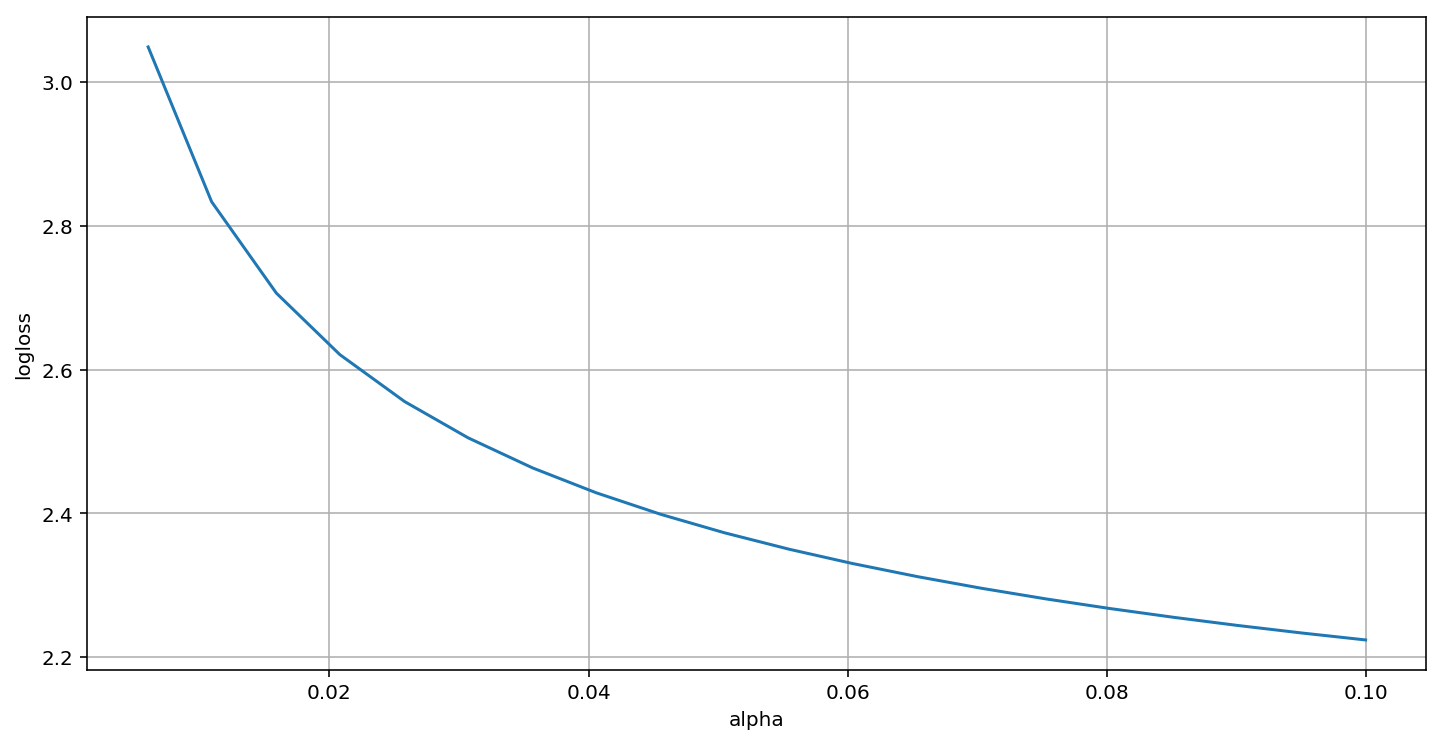

In [109]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [110]:
print("Best parameter: ",gridsearch1.best_params_)

Best parameter:  {'alpha': 0.1}


In [111]:
print("Best score: ",gridsearch1.best_score_) 

Best score:  -2.2241000580137573


In [112]:
alpha_list2 = np.linspace(0.006, 0.1, 20)
alpha_list2 = np.around(alpha_list2, decimals=4)
alpha_list2

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [113]:
parameter_grid = [{"alpha":alpha_list2}]

In [114]:
# classifier object
classifier2 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch2 = GridSearchCV(classifier2,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch2.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [115]:
results2 = pd.DataFrame()
# collect alpha list
results2['alpha'] = gridsearch2.cv_results_['param_alpha'].data
# collect test scores
results2['neglogloss'] = gridsearch2.cv_results_['mean_test_score'].data

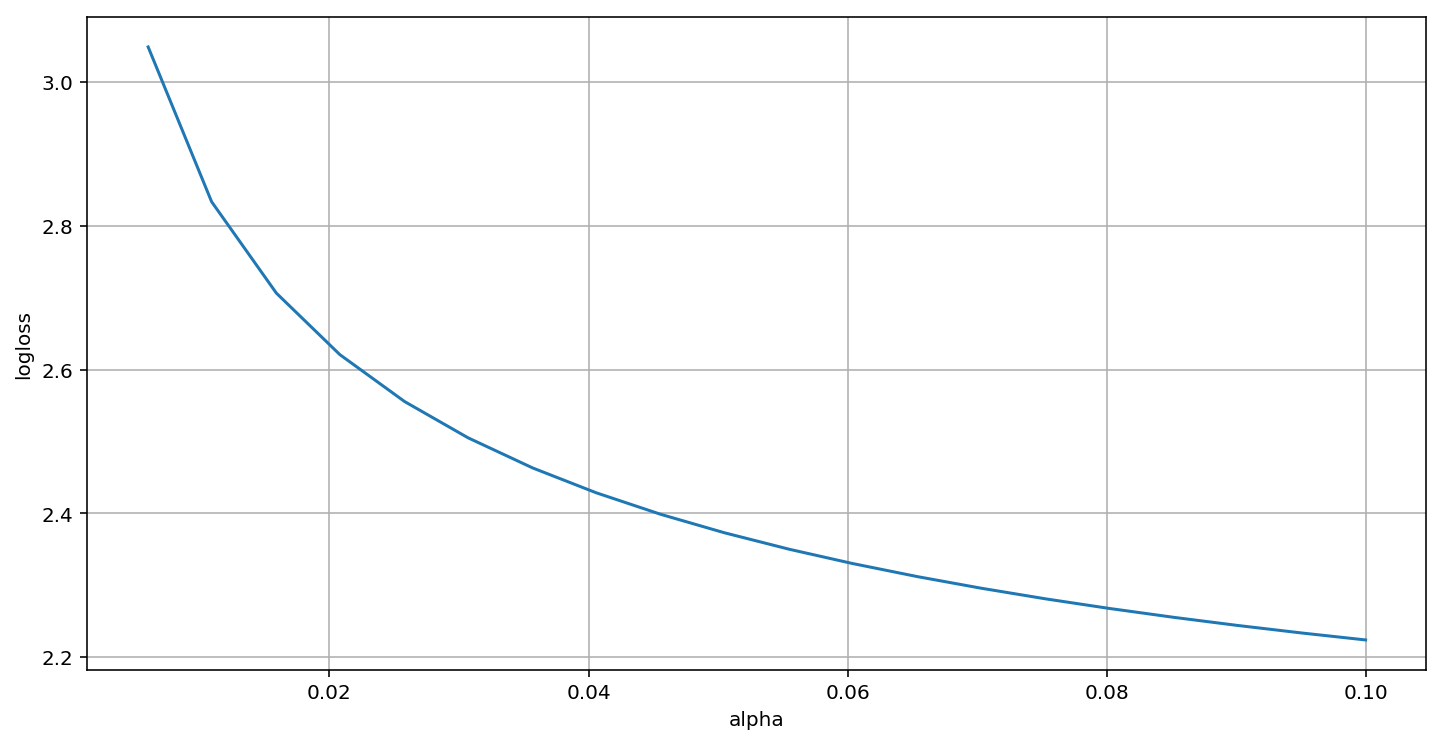

In [116]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results2['alpha'], -results2['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [117]:
print("Best parameter: ",gridsearch2.best_params_)

Best parameter:  {'alpha': 0.1}


In [118]:
print("Best score: ",gridsearch2.best_score_)

Best score:  -2.2241000580137573
